# Introduction

This notebook attempts to provide a solution to the problem of data loss in temperature in Celsius measurement in 10-minute intervals.

There are 2007 records in 600-second periods and data imputation is to be performed using different mechanisms.

In [5]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
 
# read the data from the csv
data = pd.read_csv("data.csv")
 
# display a resume of data
data.describe()

,33.2
count,2007.000000
mean,31.851505
std,8.492132
min,3.250000
25%,33.510000
50%,34.130000
75%,35.030000
max,36.540000


As we can see, there are data that do not conform to the average. The minimum value is 3.25 while the average is around 33.2

If we show an interval, we can find anomalies in the data.

<AxesSubplot: >

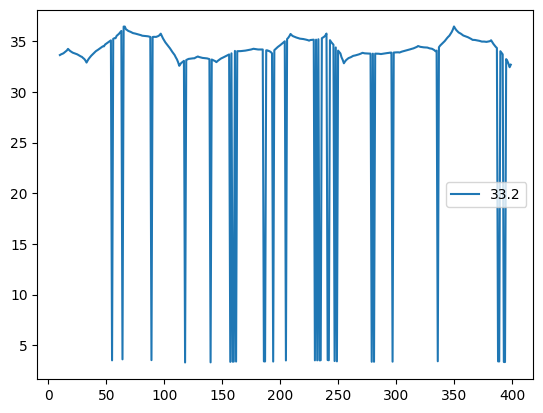

In [7]:
data[10:400].plot()

# Data Clean

The first step is to remove the erroneous values. To do so, we are going to study how they originate.

In a box diagram we see how the outliers are characterised by very small values.

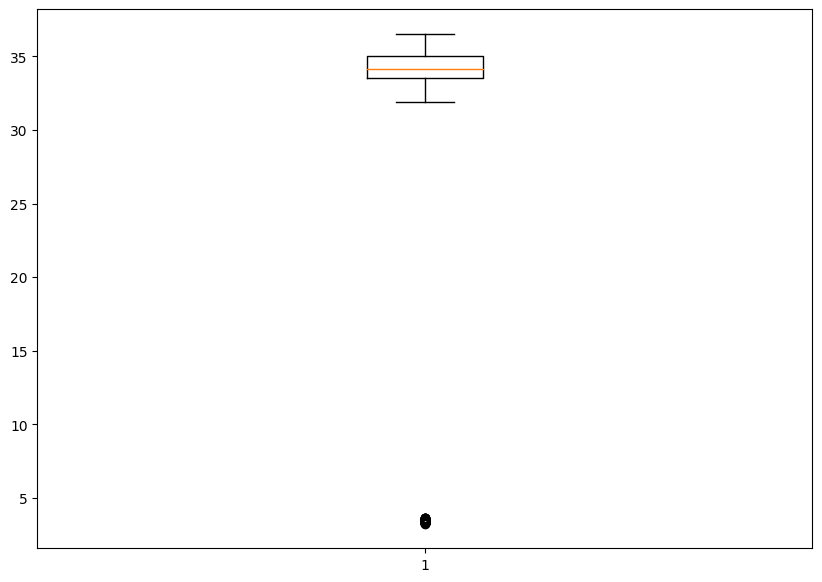

In [8]:
fig = plt.figure(figsize =(10, 7)) 
  
plt.boxplot(data) 
  
plt.show() 

We can then use a simple sequential algorithm to remove the values.

In [11]:
dataClean = list()
for i in data.values:
    if i < 30:
        dataClean.append(np.nan)
    else:
        dataClean.append(i)
dataClean = pd.DataFrame(dataClean)
dataClean.isnull().sum()

0    163
dtype: int64

Now we got 163 NaN values.

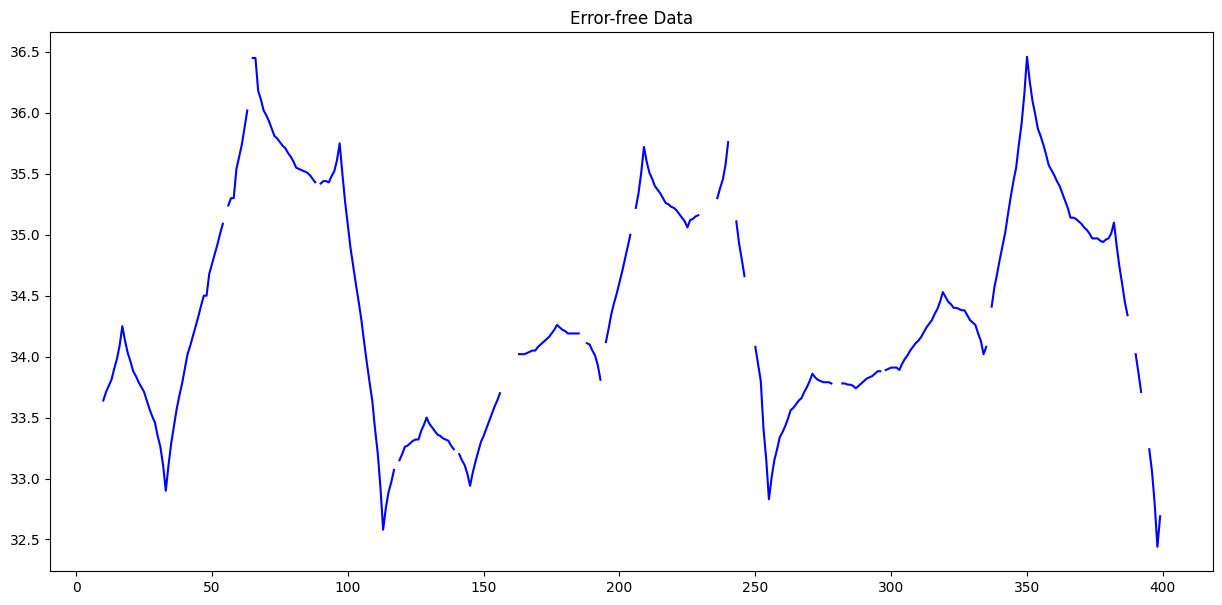

In [13]:
# set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(dataClean[10:400], color='blue')
# adds title to our time series plot
plt.title('Error-free Data') 
# print the plot
plt.show()

# Data Imputation

## Median

First try using an imputation based on the median.

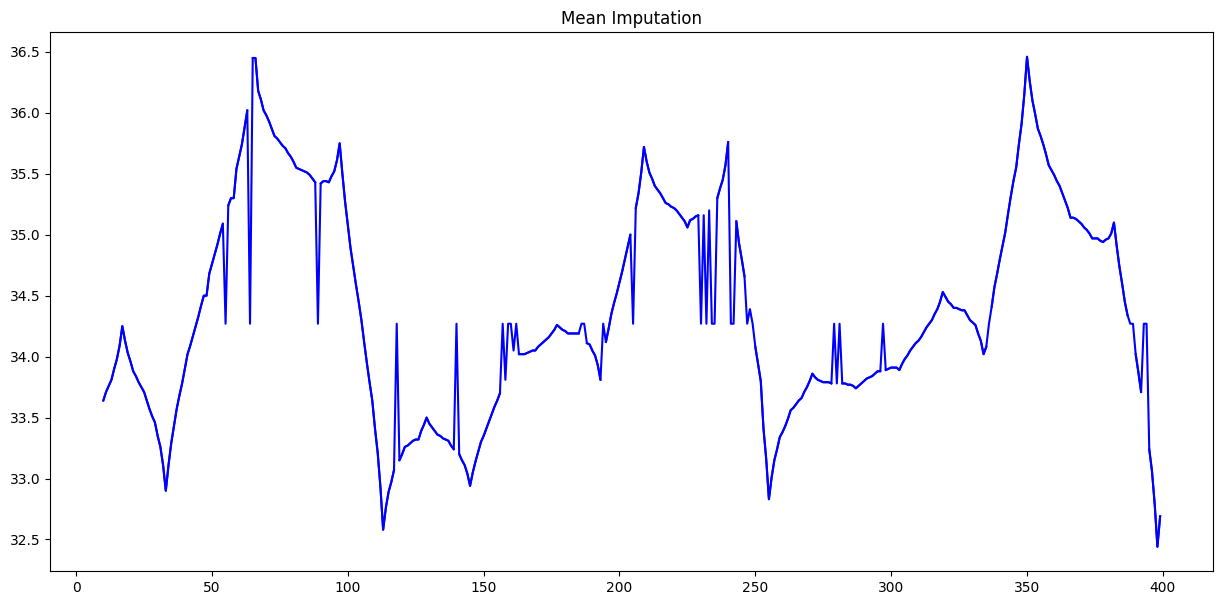

In [16]:
warnings.filterwarnings('ignore')
# set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
# fill the missing data using the mean of the present observations
dataset = dataClean.assign(FillMean=dataClean.fillna(dataClean.median()))
# plots our series
plt.plot(dataset[10:400], color='blue')
# adds title to our time series plot
plt.title('Mean Imputation')
# print the plot
plt.show()

This imputation mechanism does not generate a good result, because the values obtained are mean values.

## Mean

Using an imputation based on the mean.

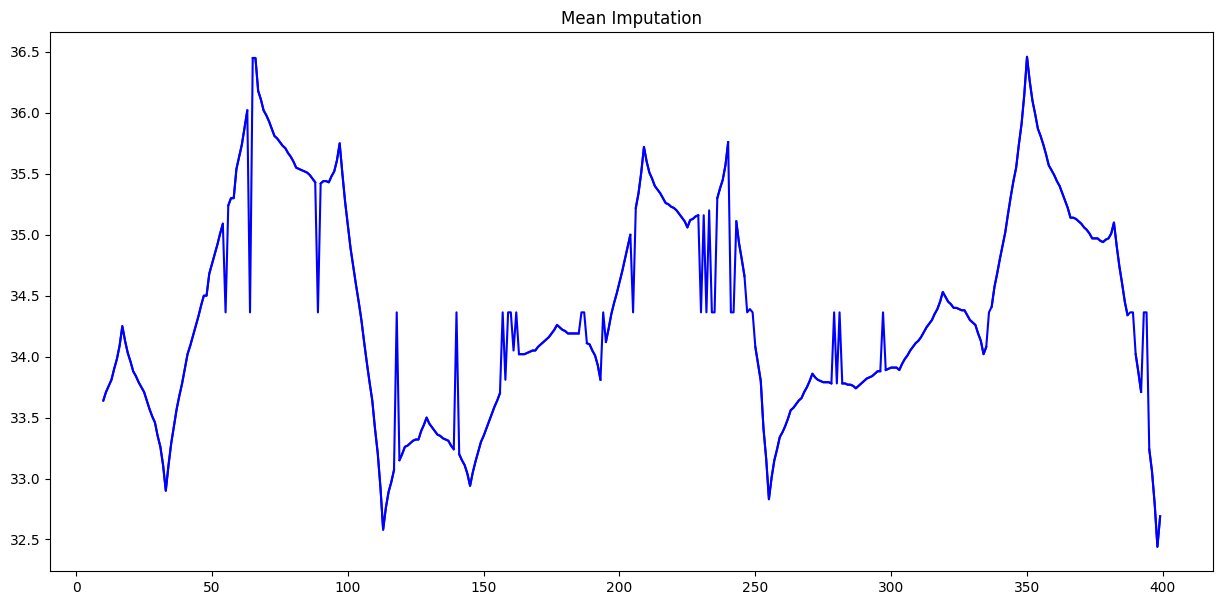

In [18]:
# declare the size of the  plot
plt.rcParams['figure.figsize']=(15,7)
# fill the missing data using the mean of the present observations
dataset = dataClean.assign(FillMean=dataClean.fillna(dataClean.mean()))
# pass the data and declared the colour of your curve, i.e., blue
plt.plot(dataset[10:400], color='blue')
# add tittle to the plot
plt.title('Mean Imputation')
 # print the plot
plt.show()

Similar to the previous case it is not a satisfactory solution.

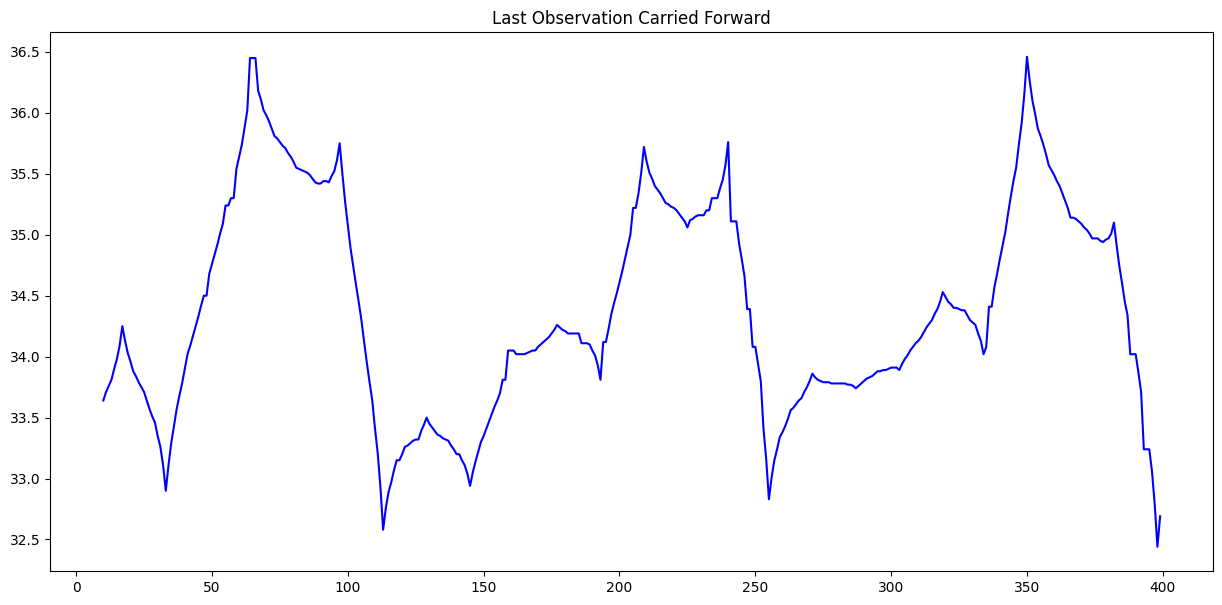

In [82]:
# figure size
plt.rcParams['figure.figsize']=(15,7)
# On the customer column of our data, impute the missing values with the LOCF
dataset= dataSet.fillna(method ='bfill')
# plot our time series with imputed values
plt.plot(dataset[10:400], color='blue')
#Plot tittle
plt.title('Last Observation Carried Forward')
# show the plot
plt.show()

<AxesSubplot: >

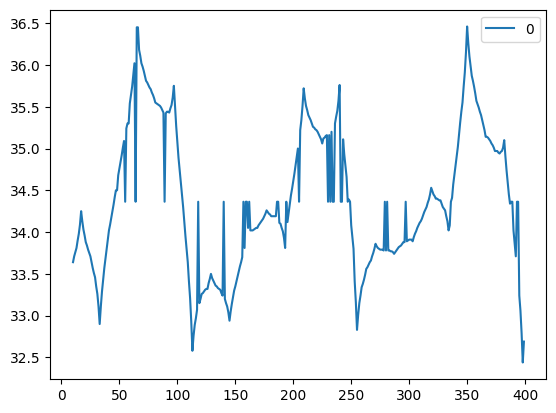

In [58]:
cleanDataSet[10:400].plot()

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

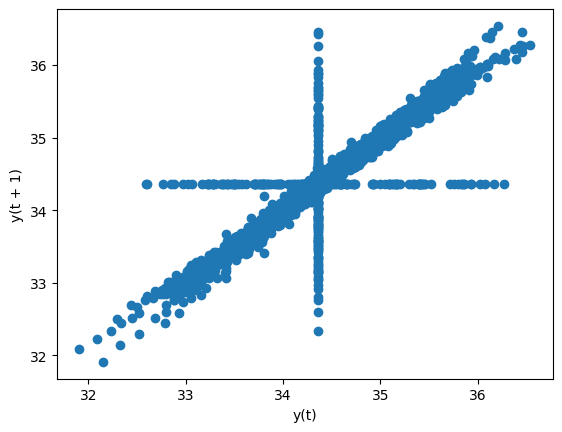

In [42]:
# lagplot
pd.plotting.lag_plot(cleanDataSet, lag=1)

In [40]:
# extracting only the temperature values
values = pd.DataFrame(data.values)
 
# using shift function to shift the values.
dataframe = pd.concat([values.shift(288), values.shift(144),
                       values.shift(72), values.shift(36), values.shift(0), values], axis=1)
# naming the columns
dataframe.columns = ['t', 't+0', 't+6', 't+12', 't+24', 't+48']
 
# using corr() function to compute the correlation
result = dataframe.corr()
 
print(result)

             t       t+0       t+6      t+12      t+24      t+48
t     1.000000  0.544990 -0.423651  0.535474  0.235412  0.235412
t+0   0.544990  1.000000 -0.597748  0.246927  0.548010  0.548010
t+6  -0.423651 -0.597748  1.000000 -0.179553 -0.593133 -0.593133
t+12  0.535474  0.246927 -0.179553  1.000000 -0.205094 -0.205094
t+24  0.235412  0.548010 -0.593133 -0.205094  1.000000  1.000000
t+48  0.235412  0.548010 -0.593133 -0.205094  1.000000  1.000000


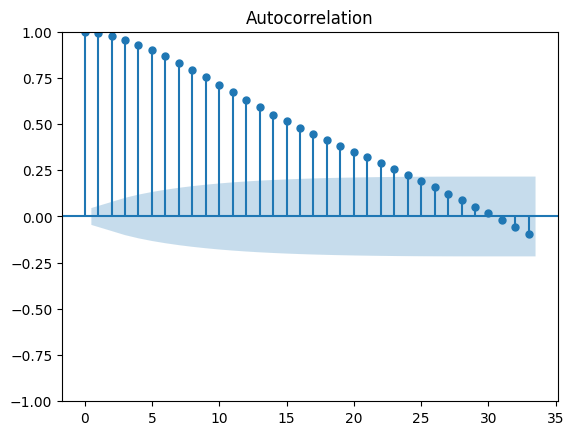

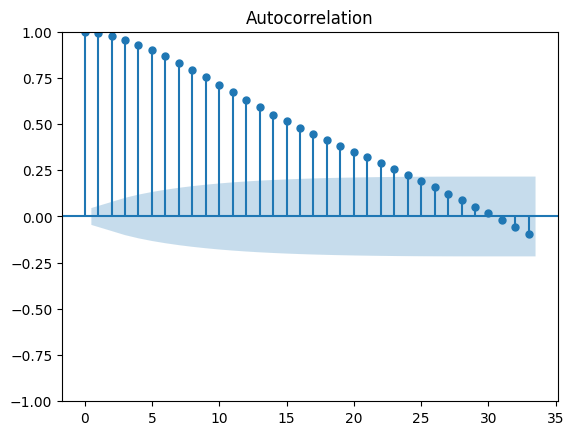

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [36]:

a=data.rolling(600).corr(data)

k = 1
for i, j in enumerate(a):
    if (i >= 5 and i < 12):
        print(f'The correlation in sales during months\
        {k} through {i+1} is {j}')
        i = 0
        k += 1

0
33.20


<AxesSubplot: >

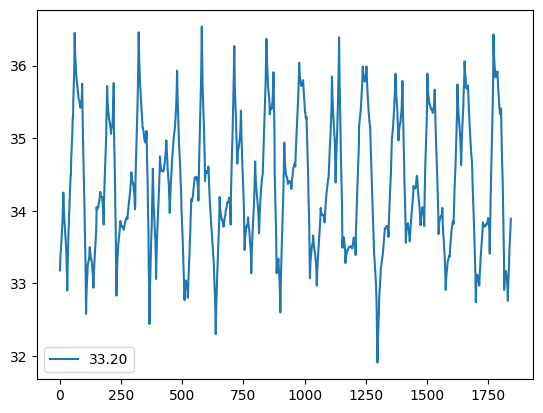

In [38]:
data.plot()

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 144)'>

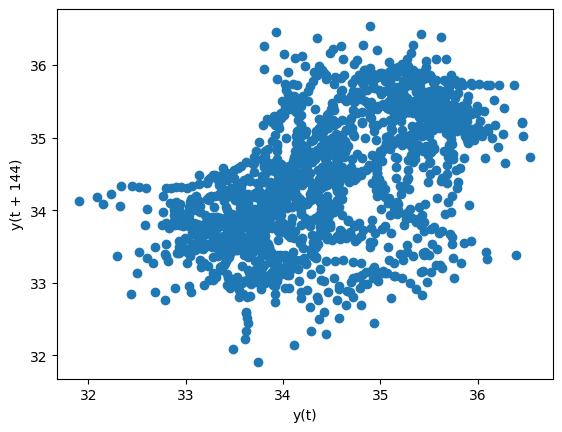

In [45]:
pd.plotting.lag_plot(data, lag=144)

In [ ]:
for i in 

<AxesSubplot: >

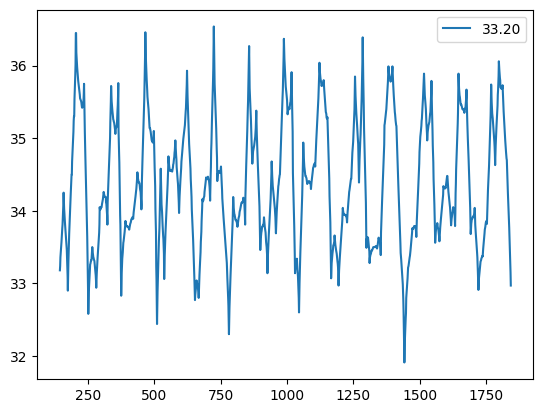

In [46]:
data.shift(144).plot()

<AxesSubplot: >

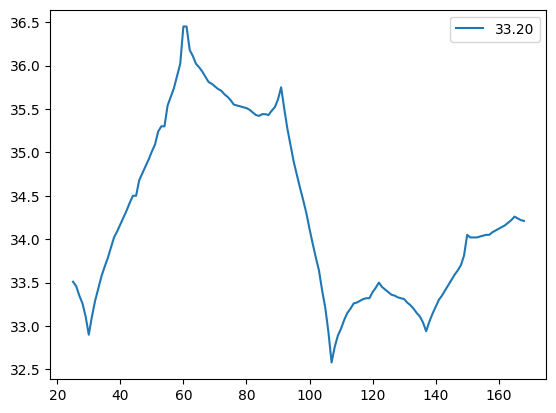

In [44]:
data[25:169].plot()